In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes
import statsmodels 
%matplotlib inline

In [125]:
df = pd.read_csv(r"G:\Manjeet\Intern_Loconav\csvs\009821702910.csv")

In [126]:
df.head(20)

,id,lat,long,created_at,updated_at,device_id,speed,orientation,distance,received_at,io_state,availability,raw_data,new_cordinate_id
0,2.120476e+09,28.710490,77.179423,2018-01-23 06:05:58,NaN,9821702910,0.3,0.0,66,2018-01-23 06:05:53,01000007,A,NaN,NaN
1,2.120480e+09,28.710492,77.179190,2018-01-23 05:11:15,NaN,9821702910,1.4,0.0,54,2018-01-23 05:11:14,01000007,A,NaN,NaN
2,2.120480e+09,28.710500,77.179227,2018-01-23 05:11:46,NaN,9821702910,0.3,0.0,54,2018-01-23 05:11:44,01000007,A,NaN,NaN
3,2.120480e+09,28.710520,77.179352,2018-01-23 05:12:17,NaN,9821702910,0.1,0.0,54,2018-01-23 05:12:14,01000007,A,NaN,NaN
4,2.120480e+09,28.710593,77.179480,2018-01-22 14:07:09,NaN,9821702910,1.1,0.0,139,2018-01-22 14:04:38,01000006,A,NaN,NaN
5,2.120480e+09,28.710303,77.179150,2018-01-22 13:22:35,NaN,9821702910,0.5,0.0,0,2018-01-22 13:22:30,01000005,A,NaN,NaN
6,2.120480e+09,28.710557,77.179248,2018-01-22 13:23:06,NaN,9821702910,0.0,0.0,0,2018-01-22 13:23:00,01000006,A,NaN,NaN
7,2.120480e+09,28.710463,77.179230,2018-01-22 13:23:36,NaN,9821702910,1.2,0.0,4,2018-01-22 13:23:31,01000007,A,NaN,NaN
8,2.120480e+09,28.710520,77.179198,2018-01-22 13:24:07,NaN,9821702910,0.7,0.0,12,2018-01-22 13:24:01,01000007,A,NaN,NaN
9,2.120480e+09,28.710843,77.179143,2018-01-22 13:24:36,NaN,9821702910,0.7,0.0,22,2018-01-22 13:24:31,01000007,A,NaN,NaN


In [127]:
df.io_state[2][-3:]

'007'

In [128]:
a = df.io_state[2][-3:]
int(a,16)

7

In [129]:
df['FuelVoltage']= df.io_state.apply(lambda x: int(x[-3:],16))

In [130]:
df.FuelVoltage.describe()

count    48782.000000
mean        74.103624
std        146.212434
min          0.000000
25%          3.000000
50%          7.000000
75%          7.000000
max        579.000000
Name: FuelVoltage, dtype: float64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48782 entries, 0 to 48781
Data columns (total 15 columns):
id                  555 non-null float64
lat                 48782 non-null float64
long                48782 non-null float64
created_at          48782 non-null object
updated_at          0 non-null float64
device_id           48782 non-null int64
speed               48782 non-null float64
orientation         48782 non-null float64
distance            48782 non-null int64
received_at         48782 non-null object
io_state            48782 non-null object
availability        48782 non-null object
raw_data            0 non-null float64
new_cordinate_id    48227 non-null float64
FuelVoltage         48782 non-null int64
dtypes: float64(8), int64(3), object(4)
memory usage: 5.6+ MB


In [132]:
mydf = pd.DataFrame()
mydf[['datetime','speed','distance','fuelVoltage']] = df[['received_at','speed','distance','FuelVoltage']]

In [133]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48782 entries, 0 to 48781
Data columns (total 4 columns):
datetime       48782 non-null object
speed          48782 non-null float64
distance       48782 non-null int64
fuelVoltage    48782 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.5+ MB


In [134]:
mydf.datetime = pd.to_datetime(mydf.datetime)
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48782 entries, 0 to 48781
Data columns (total 4 columns):
datetime       48782 non-null datetime64[ns]
speed          48782 non-null float64
distance       48782 non-null int64
fuelVoltage    48782 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.5 MB


In [135]:
mydf.to_csv("G:\Manjeet\Intern_Loconav\csvs\data6.csv")

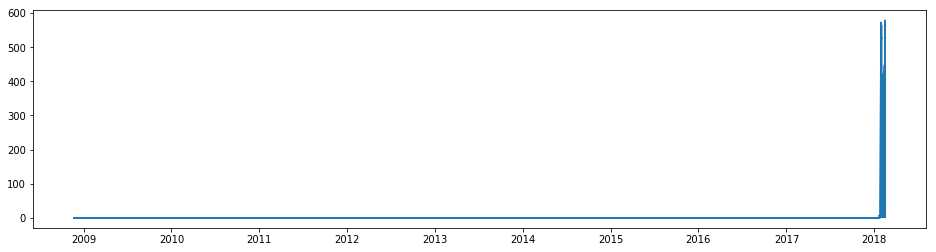

In [137]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(mydf.datetime,mydf.fuelVoltage);

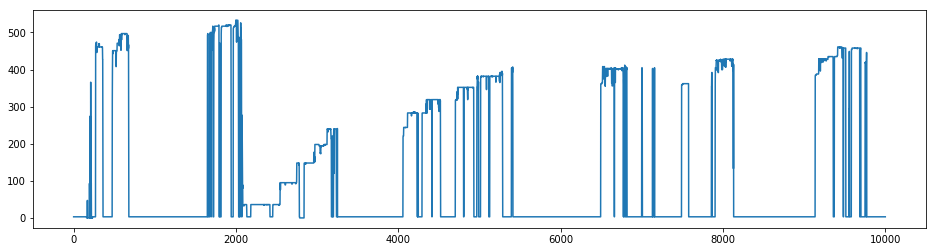

In [124]:
plt.plot(mydf.index[:10000],mydf.fuelVoltage[:10000]);

### Points to Address
1. Data data has error in some places, day and month has to be rearranged
2. Database is not exactly sorted w.r.t. to date
